# Data Wrangling Project

#### _by Tatiana Kurilo_ 

Data gathering, assessing and cleaning stages are documented in [wrangle_report.html](wrangle_report.html).  
Parts of the data analysis and visualisations are presented in a more "reader-friendly" way in [act_report.html](act_report.html).

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#analysis">Data Analysis</a></li>
</ul>

<a id='gathering'></a>
# Data Gathering

In [1]:
# imports

import os
import time
import requests
import pandas as pd
import tweepy
import json
import numpy as np

### Loading Twitter Archive Data Locally

I downloaded `twitter_archive_enhanced.csv`, uploaded it to the Project Workspace on Udacity and read it to the dataframe `twitter_archive` with `pandas`.   

In [2]:
# loading twitter archive data

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

### Downloading Image Prediction Data Programmatically

I wrote the code to download `image_predictions.tsv` to Project Workspace directly and read it to the dataframe `image_predictions` with `pandas`.  

In [3]:
# getting image prediction data file

image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(image_prediction_url)

with open("image_predictions.tsv", mode = 'wb') as file:
        file.write(r.content)

In [4]:
# loading image prediction data

image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

### Gathering Information Via Twitter API

I wrote a script to get Twitter JSON data via API with `Tweepy` library, using the list of Tweet IDs from `twitter_archive` dataframe, and saved it to `tweet_json.txt` file.  I uploaded this file to the Project Workspace and added the code of the script to the project notebook without authentification keys. Since it would cause errors if left that way, I commented the cell that contains the code. I read the data from `tweet_json.txt` to the dataframe `tweet_jsons`, using `json` and `pandas` libraries.

In [5]:
# Twitter data gathering script. Uncomment and add your keys to run.

#tokens = {"consumer_key": "",
#         "consumer_secret": "",
#         "oauth_token": "",
#         "oauth_token_secret": ""}
#
#consumer_key = tokens["consumer_key"]
#consumer_secret = tokens["consumer_secret"]
#oauth_token = tokens["oauth_token"]
#oauth_token_secret = tokens["oauth_token_secret"]
#
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(oauth_token, oauth_token_secret)
#api = tweepy.API(auth)
#
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(oauth_token, oauth_token_secret)
#api = tweepy.API(auth, wait_on_rate_limit = True)
#
#filename = 'tweet_json.txt'
#
#try:
#    os.remove(filename)
#except OSError:
#    pass
#
#tweet_errors = {}
#count = 0
#
#with open(filename, 'a') as f:
#    for tweet_id in twitter_archive['tweet_id']:
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, f)
#            f.write('\n')
#            count += 1
#        except tweepy.TweepError as e:
#            print(tweet_id, e.args[0][0]['message'])
#            tweet_errors[tweet_id] = e.reason
#        time.sleep(1.2)
#        if count % 100 == 0:
#            print(count)
#
#print("Errors:", tweet_errors)

#print("Count:", str(count))

In [6]:
# script output: count

print("Count: 2340")

Count: 2340


In [7]:
# script output: errors

errors = {888202515573088257: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          873697596434513921: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          872668790621863937: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          869988702071779329: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          866816280283807744: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          861769973181624320: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          845459076796616705: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          842892208864923648: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          837012587749474308: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          827228250799742977: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          812747805718642688: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          802247111496568832: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          775096608509886464: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          770743923962707968: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          754011816964026368: "[{'code': 144, 'message': 'No status found with that ID.'}]", 
          680055455951884288: "[{'code': 144, 'message': 'No status found with that ID.'}]"}

len(list(errors.keys()))

16

There are 16 tweets in the original Twitter archive data, which are now missing online. For other 2340 tweets the additional information on likes and retweets was gathered successfully.

In [8]:
# reading JSON data from the text file

json_list = []

with open('tweet_json.txt') as f:
    for line in f.readlines():
        a_json = json.loads(line)
        json_list.append({'tweet_id': a_json['id'], 
                            'favorite_count': a_json['favorite_count'], 
                            'retweet_count': a_json['retweet_count']})
    
tweet_jsons = pd.DataFrame(json_list)
tweet_jsons.head()

favorite_count  retweet_count            tweet_id
0           37855           8260  892420643555336193
1           32526           6104  892177421306343426
2           24492           4041  891815181378084864
3           41205           8410  891689557279858688
4           39384           9109  891327558926688256

In [9]:
# rearranging columns

tweet_jsons = tweet_jsons[['tweet_id', 'favorite_count', 'retweet_count']]
tweet_jsons.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           37855           8260
1  892177421306343426           32526           6104
2  891815181378084864           24492           4041
3  891689557279858688           41205           8410
4  891327558926688256           39384           9109

<a id='assessing'></a>
# Data Assessing

### WeRateDogs Twitter Archive Data

In [10]:
twitter_archive.shape

(2356, 17)

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 17 variable in `twitter_archive` dataframe, first 10 of which are from the original Twitter data, and 7 were added later, based mostly on the content of the tweets. 
For timestamp columns we can see wrong data types above. Also there are non-null values in columns indicating retweets and replies. Retweets should be excluded by the project guidelines, replies needs to be further assessed.  
Since it is impossible for a dog to be in all stages simultaneously, we can assume, that in dog stage columns negative/missing options are encoded with strings, and not `NaN`.

In [12]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [13]:
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [14]:
twitter_archive.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
773   776249906839351296                    NaN                  NaN   
1449  696100768806522880                    NaN                  NaN   
2135  670061506722140161                    NaN                  NaN   
2232  668221241640230912                    NaN                  NaN   
2149  669684865554620416           6.693544e+17         4.196984e+09   
1017  746872823977771008                    NaN                  NaN   
1595  686358356425093120                    NaN                  NaN   
1616  685198997565345792                    NaN                  NaN   
2300  667062181243039745                    NaN                  NaN   
1086  738166403467907072                    NaN                  NaN   

                      timestamp  \
773   2016-09-15 02:42:54 +0000   
1449  2016-02-06 22:38:50 +0000   
2135  2015-11-27 02:08:07 +0000   
2232  2015-11-22 00:15:33 +0000   
2149  2015-11-26 01:11:28 +0000   
1017  2016-06-26 01:08:52 +0000   
1595  2016-01-11 01:25:58 +0000   
1616  2016-01-07 20:39:06 +0000   
2300  2015-11-18 19:29:52 +0000   
1086  2016-06-02 00:32:39 +0000   

                                                 source  \
773   <a href="http://twitter.com/download/iphone" r...   
1449  <a href="http://vine.co" rel="nofollow">Vine -...   
2135  <a href="http://twitter.com/download/iphone" r...   
2232  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
1017  <a href="http://twitter.com/download/iphone" r...   
1595  <a href="http://twitter.com/download/iphone" r...   
1616  <a href="http://twitter.com/download/iphone" r...   
2300  <a href="http://twitter.com/download/iphone" r...   
1086  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
773   RT @dog_rates: We only rate dogs. Pls stop sen...         7.007478e+17   
1449  This poor pupper has been stuck in a vortex si...                  NaN   
2135  This is Liam. He has a particular set of skill...                  NaN   
2232  These two dogs are Bo &amp; Smittens. Smittens...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
1017  This is a carrot. We only rate dogs. Please on...                  NaN   
1595  Heartwarming scene here. Son reuniting w fathe...                  NaN   
1616  This is Alfie. That is his time machine. He's ...                  NaN   
2300  This is Keet. He is a Floridian Amukamara. Abs...                  NaN   
1086  This is Axel. He's a professional leaf catcher...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
773               4.196984e+09  2016-02-19 18:24:26 +0000   
1449                       NaN                        NaN   
2135                       NaN                        NaN   
2232                       NaN                        NaN   
2149                       NaN                        NaN   
1017                       NaN                        NaN   
1595                       NaN                        NaN   
1616                       NaN                        NaN   
2300                       NaN                        NaN   
1086                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
773   https://twitter.com/dog_rates/status/700747788...                11   
1449                      https://vine.co/v/i1KWj0vbvA9                10   
2135  https://twitter.com/dog_rates/status/670061506...                11   
2232  https://twitter.com/dog_rates/status/668221241...                10   
2149                                                NaN                11   
1017  https://twitter.com/dog_rates/status/746872823...                11   
1595  https://twitter.com/dog_rates/status/686358356...                10   
1616  https://twit

In [15]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The `source` variable can be converted to category type, since it has limited number of values. However, the HTML information should be excluded for readabitily.

In [16]:
pd.set_option('display.max_colwidth', -1)

twitter_archive[twitter_archive.expanded_urls.notnull()][['tweet_id', 'expanded_urls']].sample(10)

tweet_id  \
1452  695767669421768709   
1526  690374419777196032   
1377  701601587219795968   
871   761599872357261312   
343   832040443403784192   
2307  666826780179869698   
1588  686730991906516992   
1040  744223424764059648   
990   748705597323898880   
1015  747103485104099331   

                                                                                                                                                                                                                                                        expanded_urls  
1452  https://twitter.com/dog_rates/status/695767669421768709/photo/1                                                                                                                                                                                                  
1526  https://twitter.com/dog_rates/status/690374419777196032/photo/1                                                                                                                                                                                                  
1377  https://twitter.com/dog_rates/status/701601587219795968/photo/1                                                                                                                                                                                                  
871   https://twitter.com/dog_rates/status/761599872357261312/photo/1                                                                                                                                                                                                  
343   https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1  
2307  https://twitter.com/dog_rates/status/666826780179869698/photo/1                                                                                                                                                                                                  
1588  https://twitter.com/dog_rates/status/686730991906516992/photo/1                                                                                                                                                                                                  
1040  https://twitter.com/strange_animals/status/672108316018024452                                                                                                                                                                                                    
990   https://twitter.com/dog_rates/status/748705597323898880/video/1                                                                                                                                                                                                  
1015  https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1

As can be seen from the table above, some tweets have duplicated URLs in `expanded_urls` column, which may come from `entities` and `extended_entities` JSON fields of original archive data.

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.rating_numerator.value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

Though ingeneral rating is expected to be in M/N format, where N is 10 and M is below or slightly higher than 10, there are numbers in these two columns, that don't fit in. Theh will require further investigation during cleaning. Also these two columns should be turned into one `rating` column by calculation to be used in further analysis.

In [19]:
pd.set_option('display.max_colwidth', -1)

twitter_archive[twitter_archive.in_reply_to_status_id.notnull()][["rating_numerator", "rating_denominator", "text"]]

rating_numerator  rating_denominator  \
30    12                10                   
55    17                10                   
64    14                10                   
113   10                10                   
148   12                10                   
149   14                10                   
179   12                10                   
184   14                10                   
186   14                10                   
188   420               10                   
189   666               10                   
218   13                10                   
228   11                10                   
234   13                10                   
251   13                10                   
274   10                10                   
290   182               10                   
291   15                10                   
313   960               0                    
342   11                15                   
346   12                10                   
387   7                 10                   
409   13                10                   
427   13                10                   
498   12                10                   
513   11                10                   
565   11                10                   
570   11                10                   
576   11                10                   
611   11                10                   
...   ..                ..                   
1479  11                10                   
1497  9                 10                   
1501  13                10                   
1523  12                10                   
1598  4                 20                   
1605  14                10                   
1618  5                 10                   
1630  12                10                   
1634  143               130                  
1663  20                16                   
1689  5                 10                   
1774  13                10                   
1819  7                 10                   
1842  11                10                   
1844  9                 10                   
1852  11                10                   
1866  13                10                   
1882  13                10                   
1885  13                10                   
1892  12                10                   
1895  11                10                   
1905  13                10                   
1914  13                10                   
1940  1                 10                   
2036  13                10                   
2038  1                 10                   
2149  11                10                   
2169  10                10                   
2189  12                10                   
2298  10                10                   

                                                                                                                                                                       text  
30    @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                                                              
55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                            
64    @RealKentMurphy 14/10 confirmed                                                                                                                                        
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs                                                                                                           
148   @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10                                 
149   Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his 

As for replies, they sometimes lack images, sometimes contain additional information being a comment to an original @dog_rates tweet, sometimes are not about dogs. For consistency of information, it may be useful to exclude replies together with retweets.

In [20]:
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [21]:
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [22]:
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [23]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

As can be seen from the output above, the missing values are encoded with "None" in string format. Also `pupper`, `puppo` and `doggo` columns may be combined in one `dog_stages` column and used as a ordinal categorical variable with three levels.

In [24]:
twitter_archive[twitter_archive.name.notnull()].apply(lambda x: x['name'] 
                                                  if x['name'][0].islower() else "Names", 
                                                  axis = 1).value_counts()

Names           2247
a               55  
the             8   
an              7   
very            5   
quite           4   
just            4   
one             4   
actually        2   
getting         2   
mad             2   
not             2   
officially      1   
my              1   
this            1   
old             1   
infuriating     1   
his             1   
such            1   
incredibly      1   
unacceptable    1   
space           1   
all             1   
life            1   
by              1   
light           1   
dtype: int64

In the `name` column there are many non-name words extracted from text and should be excluded. Still, some tweets may also contain names in text, but not where it was expected. This will require further investigation during data cleaning.

#### Quality Issues In Twitter Archive Data

1. 78 tweets are replies and can't be counted as tweets of "standart format" with an image, a text presenting the dog in the image and a rating number, as they often lack some of this informantion.  
2. 181 tweets have non-null values in `retweeted_status_id` and `retweeted_status_user_id`, which means that these tweets are actually retweets, and this doesn't follow the project guidelines.  
3. Missing values in dog stage columns, `floofer` and `name` column encoded with "None" strings, and not `pandas` `NaN` values.  
4. Values in `timestamp` and `retweeted_status_timestamp` columns not in datetime format.  
5. Values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` columns in float format and scientific notation, but in case of removing retweets and replies, this won't need any additional actions for these columns together with `retweeted_status_timestamp` will be columns with null values only and can be dropped.  
6. Some rating numerators are too large for "M/10" pattern - it is ok, when M is larger than 10 by some points, but not in times. Some are unexpectedly low.  
7. Some rating denominators isn't equal to 10.  
8. `Name` column contain articles and other "non-name" words.
9. Values in `source` column are links with HTML wrapped around the actual content, which doesn't improve readability. Also, the type of the column should be category.  
10. Duplicated URLs in the same cells of `expanded_urls` column.  

#### Tidiness Issues In Twitter Archive Data

1.  Dog stages columns - `pupper`, `puppo` and `doggo` - may be combined in one as the levels of one categorical variable. Still, dual values for many dogs in a picture may occur. 
2. Rating columns - `rating_numerator` and `rating_denominator` - should be used to calculate one rating value in float format to be used in analysis.  

---

### Image Prediction Data

In [25]:
image_predictions.shape

(2075, 12)

In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   
2  1        German_shepherd         0.596461  True    malinois             
3  1        Rhodesian_ridgeback     0.408143  True    redbone              
4  1        miniature_pinscher      0.560311  True    Rottweiler           

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog    0.061428  True    
1  0.074192  True    Rhodesian_ridgeback  0.072010  True    
2  0.138584  True    bloodhound           0.116197  True    
3  0.360687  True    miniature_pinscher   0.222752  True    
4  0.243682  True    Doberman             0.154629  True

In [28]:
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070  2        basset       0.555712  True    English_springer    0.225770   
2071  1        paper_towel  0.170278  False   Labrador_retriever  0.168086   
2072  1        Chihuahua    0.716012  True    malamute            0.078253   
2073  1        Chihuahua    0.323581  True    Pekinese            0.090647   
2074  1        orange       0.097049  False   bagel               0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070  True    German_short-haired_pointer  0.175219  True    
2071  True    spatula                      0.040836  False   
2072  True    kelpie                       0.031379  True    
2073  True    papillon                     0.068957  True    
2074  False   banana                       0.076110  False

In [29]:
image_predictions.sample(10)

tweet_id                                          jpg_url  \
656   682259524040966145  https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg   
916   701545186879471618  https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg   
1034  711732680602345472  https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg   
344   672267570918129665  https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg   
782   690005060500217858  https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg   
1735  821765923262631936  https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg   
698   684567543613382656  https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg   
1245  747512671126323200  https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg   
1737  821886076407029760  https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg   
1125  727314416056803329  https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
656   1        Siberian_husky    0.439670  True    Eskimo_dog           
916   1        Border_collie     0.280893  True    Cardigan             
1034  3        dingo             0.366875  False   Ibizan_hound         
344   1        Irish_terrier     0.716932  True    miniature_pinscher   
782   1        Samoyed           0.270287  True    Great_Pyrenees       
1735  1        golden_retriever  0.980071  True    Labrador_retriever   
698   1        minibus           0.401942  False   llama                
1245  1        Cardigan          0.111493  True    malinois             
1737  1        golden_retriever  0.266238  True    cocker_spaniel       
1125  2        toy_poodle        0.827469  True    miniature_poodle     

       p2_conf  p2_dog               p3   p3_conf  p3_dog  
656   0.340474  True    malamute         0.101253  True    
916   0.112550  True    toy_terrier      0.053317  True    
1034  0.334929  True    Eskimo_dog       0.073876  True    
344   0.051234  True    Airedale         0.044381  True    
782   0.114027  True    teddy            0.072475  False   
1735  0.008758  True    Saluki           0.001806  True    
698   0.229145  False   seat_belt        0.209393  False   
1245  0.095089  True    German_shepherd  0.080146  True    
1737  0.223325  True    Irish_setter     0.151631  True    
1125  0.160760  True    Tibetan_terrier  0.001731  True

In [30]:
twitter_archive.shape[0] - image_predictions.shape[0]

281

##### Quality Issues in Image Prediction Data

- Missing information for 281 tweets in Twitter Archive Data.
- Underscores in predictions may be changed to spaces for readability.  
- Predictions may be changed to category type.  

In some cases it may by reasonable also to combine the predictions into three columns:  
   >Number Of Prediction | Dog Breed | Confidence   
   
but for the purpose of this project where such changes may lead to many rows with the same tweets, it seems unreasonable.  

---

### Additional Twitter Data

In [31]:
tweet_jsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [32]:
tweet_jsons.head(20)

tweet_id  favorite_count  retweet_count
0   892420643555336193  37855           8260         
1   892177421306343426  32526           6104         
2   891815181378084864  24492           4041         
3   891689557279858688  41205           8410         
4   891327558926688256  39384           9109         
5   891087950875897856  19800           3027         
6   890971913173991426  11572           2001         
7   890729181411237888  63873           18344        
8   890609185150312448  27212           4160         
9   890240255349198849  31203           7176         
10  890006608113172480  29986           7127         
11  889880896479866881  27193           4837         
12  889665388333682689  47038           9761         
13  889638837579907072  26530           4400         
14  889531135344209921  14777           2187         
15  889278841981685760  24668           5214         
16  888917238123831296  28474           4379         
17  888804989199671297  24995           4165         
18  888554962724278272  19385           3443         
19  888078434458587136  21270           3395

In [33]:
twitter_archive.shape[0] - tweet_jsons.shape[0]

16

##### Quality Issues in Additional Twitter Data

- Missing information for 16 tweets in Twitter Archive Data: Twitter returned "No status found with that ID" message.

---

<a id='cleaning'></a>
# Data Cleaning

### Define

The following steps need to be taken to clean and combine the data for further analysis.  

1. Identify and exclude the rows in `twitter_archive` dataframe that correspond to retweets and replies.  
2. Exclude `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` columns.  
3. Convert values in `timestamp` column to datetime format.  
4. Clean HTML information in `source` column and convert it to category type.  
5. Remove duplicated URLs from `expanded_urls` column. 
6. Replace `None` values in `dog_stages` and `name` with `pandas` `NaN` values.  
7. Check if any names can be extracted from tweets with non-name words in `name` column and add the proper names, if any.
8. Replace other "non-name" values in `name` column with `NaN` values.
9. Combine `pupper`, `puppo` and `doggo` columns in one `dog_stages` column. 
10. Check `dog_stages` for correctness. 
11. Explore the rating numerators and denominators to define if the ratings can be corrected or should be excluded.  
12. Combine the cleaned `rating_numerator` and `rating_denominator` columns in one `rating` column in float format.  

13. Join `twitter_archive` dataframe with `image_predictions` and `tweet_jsons` dataframe on `tweet_id`/`id` columns, removing the rows which tweet IDs are not present in all three dataframes.  

---

### Code & Test

In [34]:
# copying the data for cleaning
archive_clean = twitter_archive.copy()

Since no modification intended of the other other dataframes and the assinging the merged dataframes to the one copied above won't affect them, there is no need tomake duplicated of them in memory.

---

1. Identify and exclude the rows in twitter archive dataframe that correspond to retweets and replies. 

In [35]:
mask = archive_clean.in_reply_to_status_id.isnull() & archive_clean.retweeted_status_id.isnull()

archive_clean = archive_clean.loc[mask, ]
archive_clean.shape

(2097, 17)

In [36]:
# test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

---

2. Exclude 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns.

In [37]:
archive_clean = archive_clean.dropna(axis = 1, how = 'all')
archive_clean.shape

(2097, 12)

In [38]:
# test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


---

3. Convert values in 'timestamp' column to datetime format. 

In [39]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [40]:
# test

assert archive_clean.timestamp.dtype == 'datetime64[ns]'

--- 

4. Clean HTML information in 'source' column and convert it to category type.

In [41]:
archive_clean.source = archive_clean.source.replace(r'^<a.*?>', '', regex = True)
archive_clean.source = archive_clean.source.replace('</a>', '', regex = True)
archive_clean.source.sample(3)  

1070    Twitter for iPhone
1716    Twitter for iPhone
1087    Twitter for iPhone
Name: source, dtype: object

In [42]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [43]:
archive_clean.source = archive_clean.source.astype('category')

In [44]:
# test

assert archive_clean.source.dtype == 'category'

---

5. Remove duplicated URLs from 'expanded_urls' column

In [45]:
archive_clean[archive_clean.expanded_urls.notnull()].expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

In [46]:
archive_clean.expanded_urls = archive_clean.apply(lambda x: 
                                                  ', '.join(set(x['expanded_urls'].split(','))) 
                                                  if pd.notnull(x['expanded_urls']) else x['expanded_urls'], 
                                                  axis = 1)

In [47]:
# test

archive_clean[archive_clean.expanded_urls.notnull()].expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

---

6. Replace "None" values in dog stages columns and 'name' columns with NaN values.

In [48]:
archive_clean.iloc[: , -5:] = archive_clean.iloc[: , -5:].replace('None', np.nan)

In [49]:
# test

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.8+ KB


---

7. Check if any names can be extracted from tweets with non-name words in 'name' column and add the proper names, if any.

8. Replace other non-name words in 'name' column with NaN.

In [50]:
archive_clean[archive_clean.name.notnull()].apply(lambda x: x['name'] 
                                                  if x['name'][0].islower() else "Names", 
                                                  axis = 1).value_counts()

Names           1390
a               55  
the             8   
an              6   
very            4   
one             4   
quite           3   
just            3   
actually        2   
not             2   
getting         2   
my              1   
officially      1   
old             1   
infuriating     1   
light           1   
all             1   
unacceptable    1   
this            1   
space           1   
mad             1   
life            1   
by              1   
such            1   
his             1   
incredibly      1   
dtype: int64

In [51]:
not_names = (archive_clean[archive_clean.name.notnull()].apply(lambda x: x['name'] 
                                                  if x['name'][0].islower() else "Names", 
                                                  axis = 1).value_counts() < 60).index.tolist()[1:]
", ".join(not_names)

'a, the, an, very, one, quite, just, actually, not, getting, my, officially, old, infuriating, light, all, unacceptable, this, space, mad, life, by, such, his, incredibly'

In [52]:
for index, row in archive_clean.iterrows():
    if row['name'] in not_names:
        print(index, row['text'])

22 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
169 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193 Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335 There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
369 Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
542 We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649 Here is a per

In some tweets, where "non-name" words were extracted, there are names present after words "named" or "name is". These names can be extacted and added to the `name` column. Other values should be replaced with `NaN`.

In [53]:
def get_name(x, text):
    """
    Function for extracting dog names from text field of a tweet, 
    if non-name word was extracted on previous iteration
    """
    split_words = ['named ', 'name is ']
    
    if x is np.nan or x[0].isupper():
        return x
    else:
        split_word = ""
        if split_words[0] in text:
            split_word = split_words[0]
        elif split_words[1] in text:
            split_word = split_words[1]
        else:
            return np.nan
        
        if split_word:
            name = text.split(split_word)[1].split(' ')[0].replace('.', '')
            
            return name

# Function test 

print(get_name(archive_clean.name[1], archive_clean.text[1]), # Name
      get_name(archive_clean.name[1878], archive_clean.text[1878]), # No name in text
      get_name(archive_clean.name[2235], archive_clean.text[2235])) # Article instead of name

Tilly nan Alfonso


In [54]:
archive_clean.name = archive_clean.apply(lambda x: get_name(x['name'], x['text']), 
                                                  axis = 1)

In [55]:
archive_clean.name.value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker       9 
Penny        9 
Winston      8 
Lola         8 
Sadie        8 
Toby         7 
Daisy        7 
Stanley      6 
Oscar        6 
Bo           6 
Bailey       6 
Jax          6 
Koda         6 
Bella        6 
Leo          5 
Scout        5 
Chester      5 
Buddy        5 
Dave         5 
Louis        5 
Milo         5 
Bentley      5 
Rusty        5 
Archie       4 
Gus          4 
Winnie       4 
            .. 
Chloe        1 
Milky        1 
Shaggy       1 
Hercules     1 
Darby        1 
Skittle      1 
Brady        1 
Peanut       1 
Flash        1 
Harnold      1 
Geoff        1 
Ed           1 
Vixen        1 
Derby        1 
Charleson    1 
Rorie        1 
Jerome       1 
Rodney       1 
Champ        1 
Shiloh       1 
Ebby         1 
Kulet        1 
Iggy         1 
Marlee       1 
Rooney       1 
Covach       1 
Blue         1 
Obie         1 
Burt         1 
Edmund       1 
Name: name, Length: 947,

In [56]:
# test

assert len(archive_clean[archive_clean.name.notnull()].apply(lambda x: x['name'] 
                                                  if x['name'][0].islower() else "Names", 
                                                  axis = 1).value_counts().index.tolist()) == 1

---

9. Combine 'pupper', 'puppo' and 'doggo' columns in one 'dog_stages' column.

In [57]:
archive_clean[['pupper', 'puppo', 'doggo']] = archive_clean[['pupper', 'puppo', 'doggo']].fillna('')
archive_clean[['pupper', 'puppo', 'doggo']].sample(10)

pupper  puppo doggo
1589  pupper             
1691                     
2102                     
816                      
502                      
636                      
94            puppo      
400                      
1997                     
1094

In [58]:
archive_clean['dog_stages'] = archive_clean.pupper.astype(str) + ',' + archive_clean.puppo +',' + archive_clean.doggo

archive_clean.dog_stages = archive_clean.dog_stages.replace(",,", np.nan)
archive_clean.iloc[: , -5:-1] = archive_clean.iloc[: , -5:-1].replace('', np.nan)

In [59]:
archive_clean.iloc[: , -5:].sample(5)

doggo floofer  pupper puppo dog_stages
542  NaN   NaN     NaN     NaN   NaN      
259  NaN   NaN     NaN     NaN   NaN      
29   NaN   NaN     pupper  NaN   pupper,, 
802  NaN   NaN     pupper  NaN   pupper,, 
412  NaN   NaN     NaN     NaN   NaN

In [62]:
archive_clean.dog_stages = archive_clean.dog_stages.str.strip(",").replace(',,', ',',  regex = True)

In [63]:
archive_clean.dog_stages.value_counts()

pupper          221
doggo           73 
puppo           23 
pupper,doggo    9  
puppo,doggo     1  
Name: dog_stages, dtype: int64

---

10. Check 'dog_stages' for correctness.

In [63]:
mask = archive_clean.dog_stages == 'puppo,doggo'

archive_clean[mask].text

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

As can be seen from the text, the stage sould be set to 'puppo'.

In [64]:
pd.options.mode.chained_assignment = None

archive_clean.dog_stages[191] = 'puppo'

archive_clean.dog_stages.value_counts()

pupper          221
doggo           73 
puppo           24 
pupper,doggo    9  
Name: dog_stages, dtype: int64

In [65]:
mask = archive_clean.dog_stages == 'pupper,doggo'

archive_clean[mask].text

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u                                                                                                          
889     Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https:

For the indexes above:  
460 - no stage  
531 - two dogs  
575 - pupper  
705 - doggo in text, but actually a hedgehog  
733 - two dogs  
889 - two dogs  
956 - doggo in picture  
1063 - two dogs  
1113 - two dogs  

In [66]:
archive_clean.dog_stages[460] = np.nan
archive_clean.dog_stages[575] = 'pupper'
archive_clean.dog_stages[705] = np.nan
archive_clean.dog_stages[956] = 'doggo'

In [67]:
archive_clean.dog_stages.value_counts()

pupper          222
doggo           74 
puppo           24 
pupper,doggo    5  
Name: dog_stages, dtype: int64

In [68]:
mask = archive_clean.dog_stages == 'doggo'

archive_clean[mask].text

9       This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A         
43      Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ  
99      Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR          
108     This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw  
110     Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                                                                                                                     
121     This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/

Of the following tweets:  
363     This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao         
389     This is Pilot. He has mastered the synchronized head tilt and sneaky tongue slip. Usually not unlocked until later doggo days. 12/10 https://t.co/YIV8sw8xkh                           
992     That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7       

363 is pupper, 298 is puppo and 992 is a horse.

In [69]:
archive_clean.dog_stages[363] = 'pupper'
archive_clean.dog_stages[389] = 'puppo'
archive_clean.dog_stages[992] = np.nan

In [70]:
archive_clean.dog_stages.value_counts()

pupper          223
doggo           71 
puppo           25 
pupper,doggo    5  
Name: dog_stages, dtype: int64

In [71]:
mask = archive_clean.dog_stages == 'puppo'

archive_clean[mask].text

12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                    
14      This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq                        
71      This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS                
94      This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V   
129     This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go         
168     Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Z

In these tweets the word "puppo" seems to be meaningful.

In [72]:
mask = archive_clean.dog_stages == 'pupper'

archive_clean[mask].text

29      This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox           
49      This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu                            
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF           
82      This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6                 
92      This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm                            
98      This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n

---

11. Explore the rating numerators and denominators to define if the ratings can be corrected or should be excluded.

In [73]:
# denominators 

denom_not_10 = archive_clean.rating_denominator.value_counts().index.tolist()[1:]

In [74]:
mask = archive_clean.rating_denominator.isin(denom_not_10)

archive_clean[mask].text

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

There are two main types of mistakes.  
1. The first occurrence of / was picked up, but it was a date of something else, but not the rating. These are scares and can be replaced manually.
2. There are many dogs on the picture, their number goes as a multiplier. 

Of the tweets above:  
516 - no rating, should be excluded   
1068 - wrong numbers taken for ratings, should be 14/10  
1165 - wrong numbers taken for ratings, should be 13/10  
1202 - wrong numbers taken for rating, should be 11/10  
1662 - wrong numbers taken for rating, should be 10/10  
2335 - wrong numbers taken for rating, should be 9/10

In other tweets ratings are "adjusted" by the number of dogs in the picture. Since the ratings will be used in float forms, this can be left as is for further division.

In [75]:
archive_clean = archive_clean.drop(516)

archive_clean.rating_numerator[1068] = 14
archive_clean.rating_denominator[1068] = 10

archive_clean.rating_numerator[1165] = 13
archive_clean.rating_denominator[1165] = 10

archive_clean.rating_numerator[1202] = 11
archive_clean.rating_denominator[1202] = 10

archive_clean.rating_numerator[1662] = 10
archive_clean.rating_denominator[1662] = 10

archive_clean.rating_numerator[2335] = 9
archive_clean.rating_denominator[2335] = 10

In [76]:
archive_clean.rating_denominator.value_counts()

10     2085
80     2   
50     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

In [77]:
checked_denominators = archive_clean.rating_denominator.value_counts().index.tolist()[1:]
mask = ~archive_clean.rating_denominator.isin(checked_denominators)

In [78]:
# numerators

archive_clean[mask].rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8       98 
7       51 
14      39 
5       34 
6       32 
3       19 
4       15 
2       9  
1       4  
75      1  
420     1  
26      1  
27      1  
1776    1  
0       1  
Name: rating_numerator, dtype: int64

In [79]:
mask_num = (archive_clean[mask].rating_numerator > 14)

archive_clean.loc[mask_num[mask_num == True].index, :][['tweet_id', 'text']]

tweet_id  \
695   786709082849828864   
763   778027034220126208   
979   749981277374128128   
1712  680494726643068929   
2074  670842764863651840   

                                                                                                                                                                   text  
695   This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq  
979   This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                                     
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                         
2074  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY

There are several tweets where ratings are not in typical forms because of special occasions, like Christmas. Three last tweets may be dropped.
Also not all numerators seem to be in integer format, may be useful to check for halves.

In [80]:
archive_clean = archive_clean.drop([979, 1712, 2074])

In [81]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

archive_clean.rating_numerator[695] = 9.75
archive_clean.rating_numerator[763] = 11.27

In [82]:
mask = archive_clean.rating_numerator == 5

archive_clean[mask].text

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948        
730     Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC                      
956     Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8        
1399    This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62    
1461    Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2                   
1508    When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
1583    Army of water dogs here. None of them know where they're going. Have no re

In [83]:
archive_clean.rating_numerator[45] = 13.5

In [84]:
archive_clean.rating_numerator.value_counts()

12.00     486
10.00     437
11.00     414
13.00     288
9.00      153
8.00      98 
7.00      51 
14.00     39 
5.00      33 
6.00      32 
3.00      19 
4.00      15 
2.00      9  
1.00      4  
60.00     1  
11.27     1  
45.00     1  
204.00    1  
13.50     1  
9.75      1  
121.00    1  
84.00     1  
0.00      1  
80.00     1  
88.00     1  
144.00    1  
44.00     1  
165.00    1  
99.00     1  
Name: rating_numerator, dtype: int64

---

12. Combine the cleaned 'rating_numerator' and 'rating_denominator' columns in one 'rating' column in float format.

In [85]:
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

In [86]:
archive_clean.rating.describe()

count    2093.000000
mean     1.061468   
std      0.214564   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

In [87]:
archive_clean = archive_clean[['tweet_id', 'timestamp', 'source', 
                               'text', 'expanded_urls', 'name', 
                               'floofer', 'dog_stages', 'rating']]

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id         2093 non-null int64
timestamp        2093 non-null datetime64[ns]
source           2093 non-null category
text             2093 non-null object
expanded_urls    2090 non-null object
name             1410 non-null object
floofer          10 non-null object
dog_stages       324 non-null object
rating           2093 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 229.4+ KB


---

13. Join twitter archive data with image predictions data and additional information from Twitter on tweet IDs. Keep only rows with data in all three dataframes

In [88]:
twitter_archive_master = archive_clean.merge(image_predictions, on = 'tweet_id', suffixes = ('', '_imp'))
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 20 columns):
tweet_id         1967 non-null int64
timestamp        1967 non-null datetime64[ns]
source           1967 non-null category
text             1967 non-null object
expanded_urls    1967 non-null object
name             1369 non-null object
floofer          8 non-null object
dog_stages       293 non-null object
rating           1967 non-null float64
jpg_url          1967 non-null object
img_num          1967 non-null int64
p1               1967 non-null object
p1_conf          1967 non-null float64
p1_dog           1967 non-null bool
p2               1967 non-null object
p2_conf          1967 non-null float64
p2_dog           1967 non-null bool
p3               1967 non-null object
p3_conf          1967 non-null float64
p3_dog           1967 non-null bool
dtypes: bool(3), category(1), datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 269.1+ KB


In [89]:
twitter_archive_master = twitter_archive_master.merge(tweet_jsons, on = 'tweet_id', suffixes = ('', '_jsons'))
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 22 columns):
tweet_id          1965 non-null int64
timestamp         1965 non-null datetime64[ns]
source            1965 non-null category
text              1965 non-null object
expanded_urls     1965 non-null object
name              1367 non-null object
floofer           8 non-null object
dog_stages        293 non-null object
rating            1965 non-null float64
jpg_url           1965 non-null object
img_num           1965 non-null int64
p1                1965 non-null object
p1_conf           1965 non-null float64
p1_dog            1965 non-null bool
p2                1965 non-null object
p2_conf           1965 non-null float64
p2_dog            1965 non-null bool
p3                1965 non-null object
p3_conf           1965 non-null float64
p3_dog            1965 non-null bool
favorite_count    1965 non-null int64
retweet_count     1965 non-null int64
dtypes: bool(3), category(1), datet

In [90]:
# writing cleaned data to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

---

<a id='analysis'></a>
# Data Analysis

A separate text-only report on data analysis in HTML format was recreated with R Markdown and includes a little less findings than the code here, for it was becoming too long. See it [here](act_report.html). 

In [91]:
# setting up graphics
import matplotlib.pyplot as plt 

% matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [92]:
# loading cleaned data
df = pd.read_csv('twitter_archive_master.csv')

In [93]:
# fixing types
df['timestamp'] = pd.to_datetime(df.timestamp)
df['dog_stages'] = df.dog_stages.astype('category')
df['source'] = df.source.astype('category')
df = df.set_index('timestamp')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1965 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 21 columns):
tweet_id          1965 non-null int64
source            1965 non-null category
text              1965 non-null object
expanded_urls     1965 non-null object
name              1367 non-null object
floofer           8 non-null object
dog_stages        293 non-null category
rating            1965 non-null float64
jpg_url           1965 non-null object
img_num           1965 non-null int64
p1                1965 non-null object
p1_conf           1965 non-null float64
p1_dog            1965 non-null bool
p2                1965 non-null object
p2_conf           1965 non-null float64
p2_dog            1965 non-null bool
p3                1965 non-null object
p3_conf           1965 non-null float64
p3_dog            1965 non-null bool
favorite_count    1965 non-null int64
retweet_count     1965 non-null int64
dtypes: bool(3), category(2), float64(4), in

---

Ok, Python. Who is the most favorited dog of all times at [@dog_rates](https://twitter.com/dog_rates/)? At least in this dataset.

In [95]:
top_dog = df.loc[df.favorite_count.idxmax(), : ]

print("Tweet:", top_dog.text + "\n", 
      "Favorite count: ", str(top_dog.favorite_count) + "\n", 
      "Retweet_count:", top_dog.retweet_count)

Tweet: Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
 Favorite count:  163530
 Retweet_count: 83146


In [96]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url = top_dog.jpg_url)

It is actually a video. And maybe you should [take a look](https://twitter.com/dog_rates/status/744234799360020481/video/1), too. But I guess, I'm not the first who suggests that. By the way, the lowest rating received a screenshot from another Twitter account fot plagiarism. Do you agree?

In [97]:
df.loc[df.rating.idxmin(), ].text

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

Ok, let's be a bit more serious. The cleaned data set consists of 1965 rows and 22 variables, including data from the WeRateDogs Twitter archive, addtional Twitter data, gathered by API, and dog breed predictions, made by a neural network.

In [98]:
df.describe()

tweet_id       rating      img_num      p1_conf       p2_conf  \
count  1.965000e+03  1965.000000  1965.000000  1965.000000  1.965000e+03   
mean   7.360774e+17  1.054734     1.202545     0.594573     1.346915e-01   
std    6.756862e+16  0.216694     0.559762     0.272061     1.010774e-01   
min    6.660209e+17  0.000000     1.000000     0.044333     1.011300e-08   
25%    6.758531e+17  1.000000     1.000000     0.362925     5.351500e-02   
50%    7.088343e+17  1.100000     1.000000     0.587764     1.175080e-01   
75%    7.881506e+17  1.200000     1.000000     0.847292     1.955730e-01   
max    8.924206e+17  1.400000     4.000000     1.000000     4.880140e-01   

            p3_conf  favorite_count  retweet_count  
count  1.965000e+03  1965.000000     1965.000000    
mean   6.021736e-02  8740.952672     2650.865649    
std    5.099516e-02  12810.601111    4724.318781    
min    1.740170e-10  78.000000       11.000000      
25%    1.605590e-02  1887.000000     591.000000     
50%    4.934910e-02  3939.000000     1273.000000    
75%    9.160200e-02  10892.000000    3028.000000    
max    2.734190e-01  163530.000000   83146.000000

As can be seen from the summary statistics on favorites, with the mean favorite count of about 8741, our top dog is a real outlier. Same is true for the retweets - the mean is about 2651. The distributions seem to be noticeably right-skewed, we can change that with histograms.

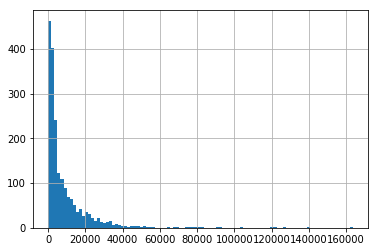

In [99]:
df.favorite_count.hist(bins = 100);

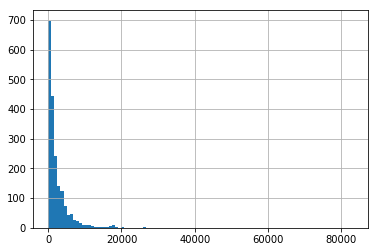

In [100]:
df.retweet_count.hist(bins = 100);

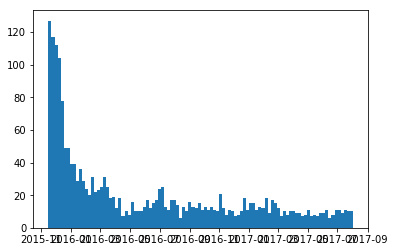

In [101]:
timestamp = df.index

plt.hist(timestamp, bins = 100);

As can be seen from the plot above, WeRateDogs took a lot of effort to promote the account, posting quite frequently during the first months. We can see if it paid off with mean retweet and favorite counts per months.

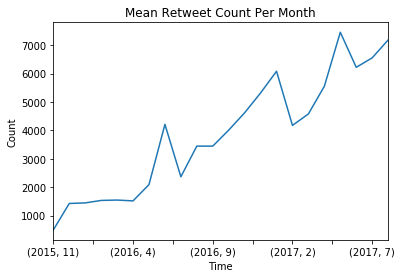

In [102]:
plot = df.groupby([df.index.year, df.index.month]).retweet_count.mean().plot()
plot.set(xlabel = 'Time', ylabel = 'Count', title = 'Mean Retweet Count Per Month');

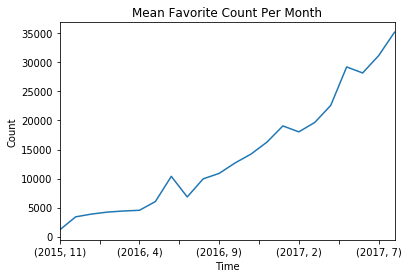

In [103]:
plot = df.groupby([df.index.year, df.index.month]).favorite_count.mean().plot()
plot.set(xlabel = 'Time', ylabel = 'Count', title = 'Mean Favorite Count Per Month');

In [104]:
df.rating.mean(), df.rating.median()

(1.0547338422391856, 1.1)

The median rating is 11/10 and the interquartile range is between 10/10 and 12/10.

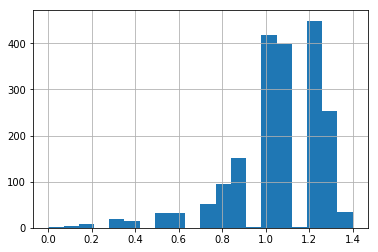

In [105]:
df.rating.hist(bins = 20);

But it seems that a dog doesn't need to have the highest possible rating to be most popular - the highest favorite and retweet counts are in 13/10 group (see the plots below). Maybe, 14/10 is too subjective?

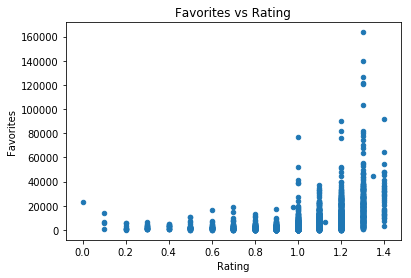

In [106]:
plot = df.plot.scatter(x = 'rating', y = 'favorite_count')
plot.set(xlabel = 'Rating', ylabel = 'Favorites', title = 'Favorites vs Rating');

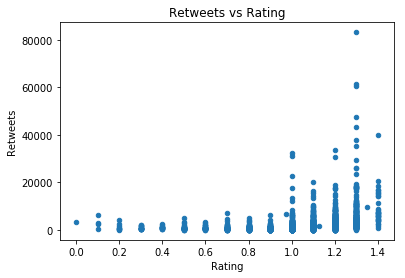

In [107]:
plot = df.plot.scatter(x = 'rating', y = 'retweet_count')
plot.set(xlabel = 'Rating', ylabel = 'Retweets', title = 'Retweets vs Rating');

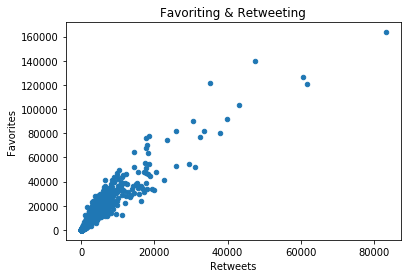

In [108]:
plot = df.plot.scatter(x = 'retweet_count', y = 'favorite_count')
plot.set(xlabel = 'Retweets', ylabel = 'Favorites', title = 'Favoriting & Retweeting');

The more retweets, the more likes. Did you expect that? Or should it be the other way around?

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


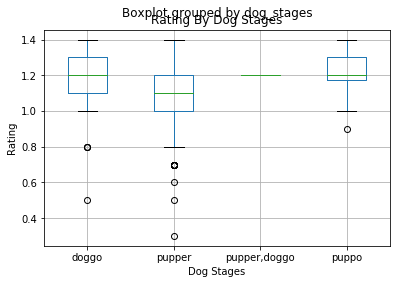

In [109]:
plot = df.boxplot(column = 'rating', by = 'dog_stages')
plot.set(xlabel = 'Dog Stages', ylabel = 'Rating', title = 'Rating By Dog Stages');

#  This cell doesn't produce any warnings on my local machine. See the act_report.html.
# It seems like Project Workspace needs some upgrade )

If you like puppies, I may have some bad news for you: their cuteness seems to win them on average lower rating, than the other stages demonstrate. The following two boxplots on ratings and favorites show the same tendency.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


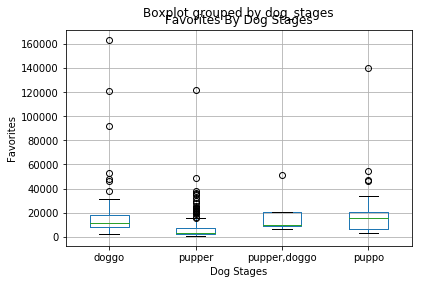

In [110]:
plot = df.boxplot(column = 'favorite_count', by = 'dog_stages')
plot.set(xlabel = 'Dog Stages', ylabel = 'Favorites', title = 'Favorites By Dog Stages');

#  This cell doesn't produce any warnings on my local machine. See the act_report.html.
# It seems like Project Workspace needs some upgrade )

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


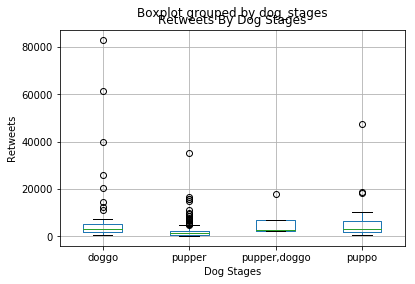

In [111]:
plot = df.boxplot(column = 'retweet_count', by = 'dog_stages')
plot.set(xlabel = 'Dog Stages', ylabel = 'Retweets', title = 'Retweets By Dog Stages');

#  This cell doesn't produce any warnings on my local machine. See the act_report.html.
# It seems like Project Workspace needs some upgrade )

In [112]:
df.dog_stages.value_counts()

pupper          203
doggo           62 
puppo           24 
pupper,doggo    4  
Name: dog_stages, dtype: int64

It's a pity that there is not enough data to judge if a pair of a dog with a pup really doing on average better than others. But we can use our ~~subjective~~ expert opinion here. Aren't they great?

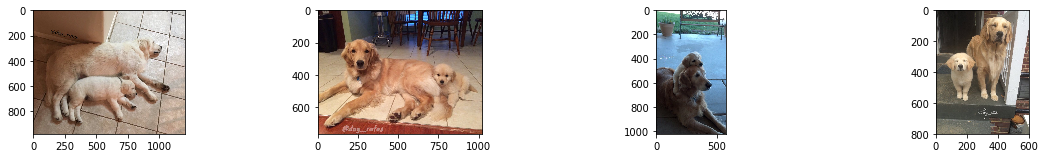

In [114]:
parents = list(df[df.dog_stages == 'pupper,doggo'].jpg_url)


from skimage import io

imgs = []
for pair in parents:
    imgs.append(io.imread(pair, 0))

plt.figure(figsize=(20,5))
columns = 4
for i, img  in enumerate(imgs):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(img)

---

#### Reference

1. Heavily exploited StackOverflow post on [multiple images in Jupyter notebooks]( https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell).